# Part I - Exploration analysis of the Ford GoBike System Data
## by Jonas Levis SOH KAMTE

## Introduction 
The Ford GoBike System Data is a set of informations about individual rides made
in a bike-sharing system covering the greater San Francisco Bay area. We will go trough the process of analysing it to find significant insights. First, we will make a preliminary wrangling, then we will do a univariate exploration, a bivariate exploration and a multivariate exploration, finally we will draw conclusions. All those steps will help us to give answer to many questions such as: <br>
-- When are most trips taken in terms of time of day, day of the week, or month of the year? <br>
-- How long does the average trip
take? <br>
-- Does the above depend on if a user
is a subscriber or customer? <br>
-- And much more ...

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import pathlib

%matplotlib inline

Downloading the dataset

In [ ]:
response = requests.get('https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv')

pathlib.Path('201902-fordgobike-tripdata.csv').write_bytes(response.content)

##### Loading the dataset

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')


##### Assessing the dataset

Preview the dataset

In [3]:
df.sample(15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
81334,428,2019-02-18 13:30:53.7280,2019-02-18 13:38:02.1570,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,182.0,19th Street BART Station,37.809013,-122.268247,6445,Subscriber,1976.0,Male,No
178637,357,2019-02-01 16:44:14.7220,2019-02-01 16:50:12.0280,50.0,2nd St at Townsend St,37.780526,-122.390288,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,4653,Subscriber,1974.0,Male,No
160992,784,2019-02-05 16:07:57.9430,2019-02-05 16:21:02.4710,323.0,Broadway at Kearny,37.798014,-122.405950,285.0,Webster St at O'Farrell St,37.783521,-122.431158,4799,Subscriber,1990.0,Male,No
49311,497,2019-02-21 22:14:09.2010,2019-02-21 22:22:26.8290,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,3796,Subscriber,1996.0,Male,Yes
117965,1051,2019-02-11 19:35:02.5710,2019-02-11 19:52:34.5000,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,150.0,Adeline St at 40th St,37.831277,-122.278267,4663,Subscriber,1993.0,Male,No
122376,965,2019-02-11 11:55:28.2520,2019-02-11 12:11:33.3510,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,364.0,China Basin St at 3rd St,37.772000,-122.389970,1884,Subscriber,1979.0,Male,No
87463,966,2019-02-17 08:19:29.7430,2019-02-17 08:35:36.0980,92.0,Mission Bay Kids Park,37.772301,-122.393028,121.0,Mission Playground,37.759210,-122.421339,4976,Subscriber,1957.0,Male,Yes
121096,310,2019-02-11 16:10:56.0150,2019-02-11 16:16:06.9000,176.0,MacArthur BART Station,37.828410,-122.266315,205.0,Miles Ave at Cavour St,37.838800,-122.258732,4828,Subscriber,1994.0,Male,No
148484,486,2019-02-06 21:47:28.9020,2019-02-06 21:55:35.0870,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,241.0,Ashby BART Station,37.852477,-122.270213,4485,Subscriber,1989.0,Male,No
70349,456,2019-02-19 18:23:20.4750,2019-02-19 18:30:57.2550,26.0,1st St at Folsom St,37.787290,-122.394380,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4924,Subscriber,NaN,NaN,No


Get general informations

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Get general statistics

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Check if there are duplicates

In [6]:
df.duplicated().value_counts(normalize=False) == len(df.index)

False    True
dtype: bool

Check for columns with null values

In [7]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

Count null values

In [8]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

 The dataset consist of 183412 bike records with 16 columns, namely duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station longitue,
end_station_id, end_station_name, end_station_latitude, end_station longitue, bike_id,
user_type, member_birth_year, member_gender, and bike_share_for_all_trip.

### What is/are the main feature(s) of interest in your dataset?

 For this case study, we will focus on duration, the start time and end time of the day, the start and end day,  the user type, the member age, the member gender and the bike share for all trip. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 Among the main features, those that will help support our investigation are mainly the duration, the start and end time , the start and end day, the user type, the member age, the member gender and the bike share for all trip.

### Cleaning the dataset

##### Make a copy

In [9]:
df2 = df.copy() 

##### Create a column with member age

In [10]:
df2['member_age'] = pd.to_datetime(df2.start_time).dt.year - df2.member_birth_year


Categorize member age by life cylce

In [11]:
def categorize_member_age(age: int) -> str:
    """this function categorize member age into the following:
        child, teenage, adult and elder
    """
    if age <= 14:
        return 'child'
    if age <= 25:
        return 'teenage'
    if age <= 64:
        return 'adult'
    return 'elder' if age >= 65 else None

In [12]:
df2['member_age_category'] = df2.member_age.apply(lambda x: categorize_member_age(x))
df2.member_age_category.sample(15)

162574    teenage
157773      adult
45786       adult
6416        adult
23522       adult
152747      adult
99043     teenage
164709      adult
112531      adult
31421       adult
121541      adult
104574      adult
13110       adult
9002        adult
147474      adult
Name: member_age_category, dtype: object

##### Extract start date and end date into new columns and replace start time and end time with the corresponding values

In [13]:
df2['start_date'] = pd.to_datetime(df2.start_time).dt.date
df2['start_day'] = pd.to_datetime(df2.start_time).dt.day_name()
df2['start_month'] = pd.to_datetime(df2.start_time).dt.month_name()
df2['start_time'] = pd.to_datetime(df2.start_time).dt.strftime('%H:%M:%S')
df2['start_periode_of_day'] = pd.to_datetime(df2.start_time).dt.strftime('%p')


df2['end_date'] = pd.to_datetime(df2.end_time).dt.date
df2['end_day'] = pd.to_datetime(df2.end_time).dt.day_name()
df2['end_month'] = pd.to_datetime(df2.end_time).dt.month_name()
df2['end_time'] = pd.to_datetime(df2.end_time).dt.strftime('%H:%M:%S')
df2['end_periode_of_day'] = pd.to_datetime(df2.end_time).dt.strftime('%p')


df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Create a column with seasons of the year

In [14]:
def get_season(x):
    """get the right season from months"""
    x = str(x).lower()
    if x in {'december', 'january', 'february', 'march'}:
        return 'winter'
    elif x in {'april', 'may'}:
        return 'spring'
    elif x in {'june', 'july', 'august', 'september'}:
        return 'summer'
    elif x in {'october', 'november'}:
        return 'fall'

df2['start_season'] = df2.start_month.apply(lambda x: get_season(x))
df2['end_season'] = df2.end_month.apply(lambda x: get_season(x))
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_date,start_day,start_month,start_periode_of_day,end_date,end_day,end_month,end_periode_of_day,start_season,end_season
0,52185,17:32:10,08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,2019-02-28,Thursday,February,PM,2019-03-01,Friday,March,AM,winter,winter
1,42521,18:53:21,06:42:03,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2019-02-28,Thursday,February,PM,2019-03-01,Friday,March,AM,winter,winter
2,61854,12:13:13,05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,2019-02-28,Thursday,February,PM,2019-03-01,Friday,March,AM,winter,winter
3,36490,17:54:26,04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,2019-02-28,Thursday,February,PM,2019-03-01,Friday,March,AM,winter,winter
4,1585,23:54:18,00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,2019-02-28,Thursday,February,PM,2019-03-01,Friday,March,AM,winter,winter


In [15]:
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'member_age_category', 'start_date', 'start_day',
       'start_month', 'start_periode_of_day', 'end_date', 'end_day',
       'end_month', 'end_periode_of_day', 'start_season', 'end_season'],
      dtype='object')

##### Reorganise columns

In [16]:
start_columns = [i for i in df2.columns if str(i).startswith('start')]
end_columns = [i for i in df2.columns if str(i).startswith('end')]
duration_columns = ['duration_sec']+start_columns+end_columns
final_columns = duration_columns + [i for i in df2.columns if i not in duration_columns]

df2 = df2.reindex(columns=final_columns)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   start_station_id         183215 non-null  float64
 3   start_station_name       183215 non-null  object 
 4   start_station_latitude   183412 non-null  float64
 5   start_station_longitude  183412 non-null  float64
 6   start_date               183412 non-null  object 
 7   start_day                183412 non-null  object 
 8   start_month              183412 non-null  object 
 9   start_periode_of_day     183412 non-null  object 
 10  start_season             183412 non-null  object 
 11  end_time                 183412 non-null  object 
 12  end_station_id           183215 non-null  float64
 13  end_station_name         183215 non-null  object 
 14  end_

Delete rows with Null values

In [17]:
df2.dropna(axis=0, inplace=True, how='any')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   start_station_id         174952 non-null  float64
 3   start_station_name       174952 non-null  object 
 4   start_station_latitude   174952 non-null  float64
 5   start_station_longitude  174952 non-null  float64
 6   start_date               174952 non-null  object 
 7   start_day                174952 non-null  object 
 8   start_month              174952 non-null  object 
 9   start_periode_of_day     174952 non-null  object 
 10  start_season             174952 non-null  object 
 11  end_time                 174952 non-null  object 
 12  end_station_id           174952 non-null  float64
 13  end_station_name         174952 non-null  object 
 14  end_

Save the cleaned dataset

In [18]:
df2.to_csv('clean.csv', index=False)


## Univariate Exploration


#### Question: How is the distribution of member age?

##### Visualization

Text(0.5, 1.0, 'Distribution of member age')

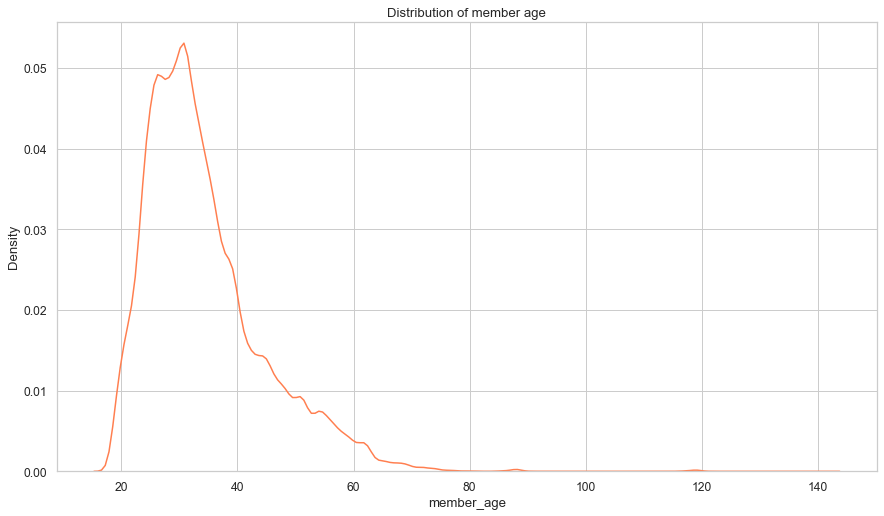

In [19]:
#set the theme for seaborn
sb.set_theme(style='whitegrid', font_scale=1.1)

#set plot dimensions
plt.figure(figsize=[14.70, 8.27])

#make a kernel density plot with title
sb.kdeplot(df2.member_age, color='coral')
plt.title('Distribution of member age')


##### Observations:


The members ages go from 18 to 78 years old with some few outliers that go beyond 80 and up to 140 years.

#### Question: How is the distribution of member age category?

##### Visualization

Text(0.5, 1.0, 'Distribution of member age category')

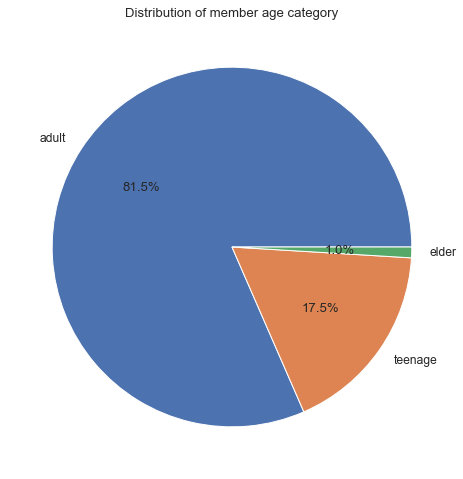

In [20]:
#set plot dimensions
plt.figure(figsize=[14.70, 8.27])

#make a pie plot
plt.pie(x=df2.member_age_category.value_counts(),
        labels=df2.member_age_category.value_counts().index, autopct='%1.1f%%',)

plt.title('Distribution of member age category')


##### Observations:
81.5% of members are adults, 17.5% are teenagers and 1% are elders

#### Question: What is the distribution of bike share for all trips?

##### Visualization

Text(0.5, 1.0, 'Distribution of bike share for all trip')

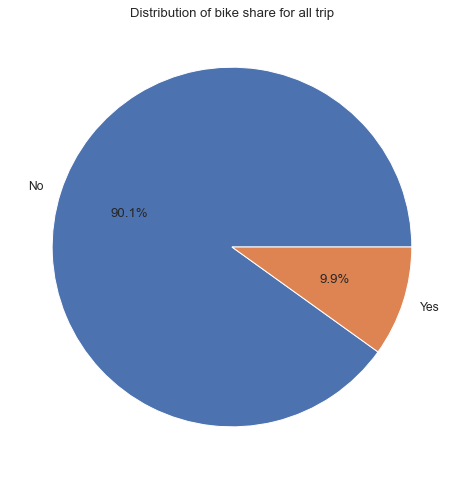

In [21]:
plt.figure(figsize=[14.70, 8.27])
# sb.histplot(df2, x=df2.bike_share_for_all_trip);
plt.pie(x=df2.bike_share_for_all_trip.value_counts(),
        labels=df2.bike_share_for_all_trip.value_counts().index, autopct='%1.1f%%',)
plt.title('Distribution of bike share for all trip')


##### Observations:
we have 90.1% for 'No' and 9.9% for 'Yes'

#### Question: what is the distribution of member gender?

##### Visualizations

Text(0.5, 1.0, 'Distribution of member gender')

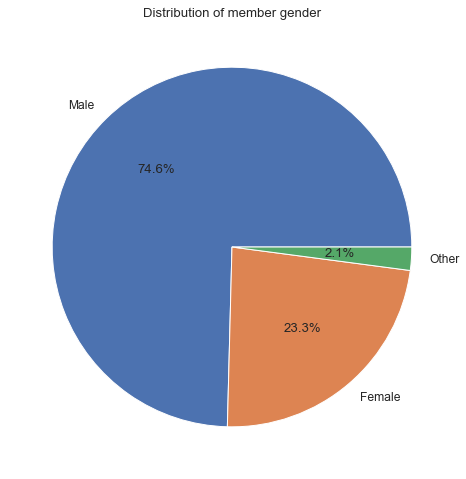

In [22]:
plt.figure(figsize=[14.70, 8.27])
plt.pie(x=df2.member_gender.value_counts(),
        labels=df2.member_gender.value_counts().index, autopct='%1.1f%%',)
plt.title('Distribution of member gender')


##### Observations:
There are 74.6% Male, 23.3% Female and 2.1% Other.

#### Question: What is the distribution of user type?

##### Visualization

Text(0.5, 1.0, 'Distribution of user type')

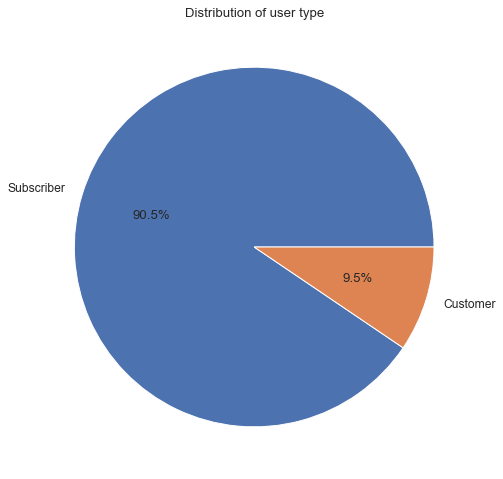

In [23]:
plt.figure(figsize=[14.70, 8.27])
# sb.histplot(df2, x=df2.user_type)
plt.pie(x=df2.user_type.value_counts(),
        labels=df2.user_type.value_counts().index, autopct='%1.1f%%',)
plt.title('Distribution of user type')


##### Observations:
90.5% of users are subscribers and only 9.5% are subscibers

#### Question: What is the distribution of periode of the day?

##### Visualizations
Start periode of the day

Text(0.5, 1.0, 'Start periode of the day')

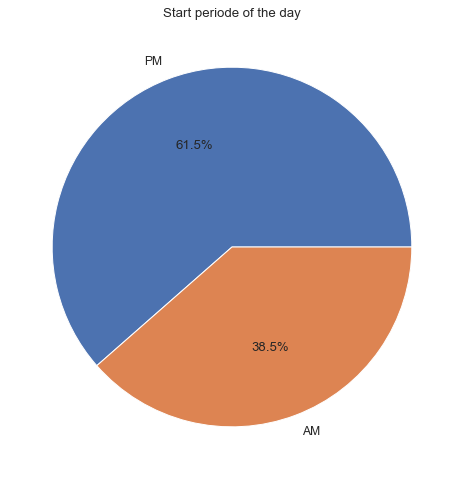

In [24]:
plt.figure(figsize=[14.70, 8.27])
plt.pie(x=df2.start_periode_of_day.value_counts(),
        labels=df2.start_periode_of_day.value_counts().index, autopct='%1.1f%%',)
plt.title('Start periode of the day')
# ax.tick_params (rotation = 60)



End periode of the day

Text(0.5, 1.0, 'End periode of the day')

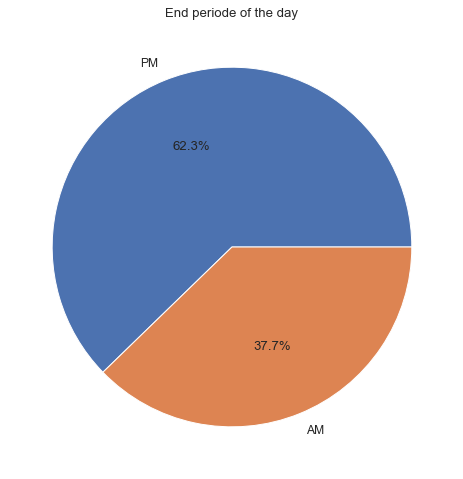

In [25]:
plt.figure(figsize=[14.70, 8.27])
plt.pie(x=df2.end_periode_of_day.value_counts(),
        labels=df2.end_periode_of_day.value_counts().index, autopct='%1.1f%%',)
plt.title('End periode of the day')


##### Obervations:
the start periode of the day 61.5% for PM and 38.5% for AM and the end periode of the day is 62.3% for PM and 37.7% for AM.

#### Question: What is the distribution of days in the week?

##### Visualizations
Start days

Text(0.5, 1.0, 'Starting days in the week')

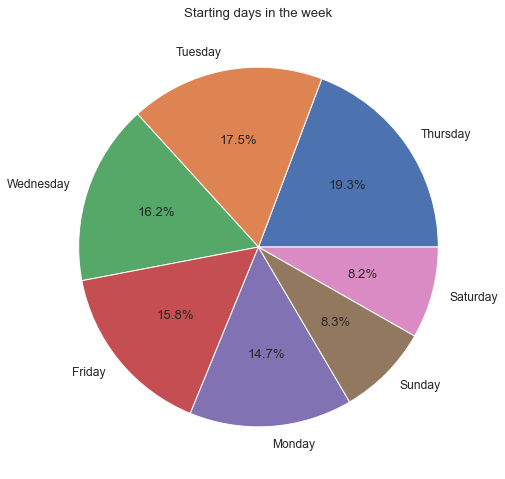

In [26]:
plt.figure(figsize=[14.70, 8.27])
plt.pie(x=df2.start_day.value_counts(),
        labels=df2.start_day.value_counts().index, autopct='%1.1f%%',)
plt.title('Starting days in the week')

End days

Text(0.5, 1.0, 'Ending days in the week')

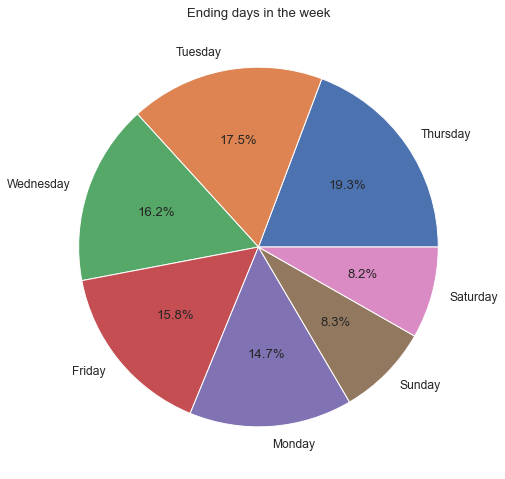

In [27]:
plt.figure(figsize=[14.70, 8.27])
plt.pie(x=df2.end_day.value_counts(),
        labels=df2.end_day.value_counts().index, autopct='%1.1f%%',)
plt.title('Ending days in the week')


##### Observations:
Thursday is the most dominant with 19.3% and saturday is least dominant with 8.2%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

--- The member ages mainly range between 18 and 78 with some few values going above 80. The distribution of the member age category is as follow: 81.5% for adults, 17.5% for teenagers, and 1% for elders. <br>
--- The bike share for all trip is distributed 90.1% 'No' against 9.9% yes <br>
--- The member gender is mostly dominated by men with a share of 74.6% and 23.3% for women, then 2.1% for others. <br>
--- The user type is heavily dominated by subscribers with a share of 90.5% against 9.5
% for customers. <br>
--- Concerning the start and end periode of the day for bike trip, we have  61.5% for PM against 38.5% for AM for the start and 62.3% for PM against 38.7% for AM for the end. <br>
--- The distribution of days are same from start day to end day with mostly tuesday  with 16.2%, wednesday with 17.5% and the top is thursday with 19.3%.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Among the investigated features, we noticed some few outliers on member ages with values that range from more than 90 to more than 100 years. We needed to get member age, so we calculated it using date extracted from the start time column and the member birth year. From the start and end time colunms, also we extracted the start and period of the day, the start and end day, the start and end month, and finaly the start and end season. The purpose was to be able to go deeper and get as much details insignths from timestamp as possible, even though seasons and months did not come in handy, since there is only one season and one start month in the dataset.

## Bivariate Exploration


#### What is the relationship between age and duration?

##### Visualizations

Text(0.5, 1.0, 'Relationship between age and duration')

<Figure size 1058.4x595.44 with 0 Axes>

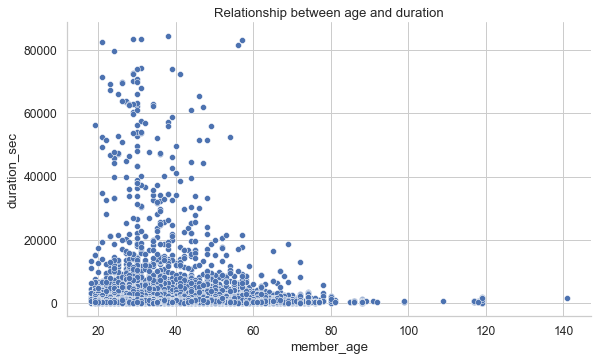

In [28]:
plt.figure(figsize=[14.70, 8.27])

#make a scatter plot with title
ax = sb.relplot(data=df2, x='member_age', y='duration_sec', aspect=1.7,)
plt.title('Relationship between age and duration')

##### Observations:
Generally, the duration sims to deacrease when age increases.

#### Question: What is the relationship between age and day of the week?

##### Visualizations:
 Start day

Text(0.5, 1.0, 'Relationship between age and start day')

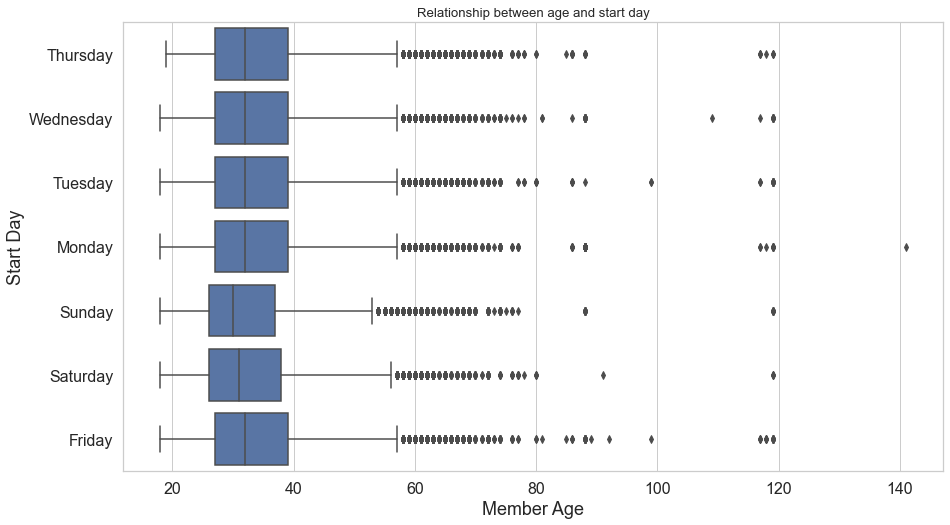

In [29]:
#set the plot dimensions
plt.figure(figsize=[14.70, 8.27])

#plot a box plot
ax = sb.boxplot(data=df2, x='member_age', y='start_day', color=sb.color_palette()[0])

#set the font size on axis
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Member Age', fontsize=18)
plt.ylabel('Start Day', fontsize=18)

plt.title('Relationship between age and start day')


 End day

Text(0.5, 1.0, 'Relationship between age and end day')

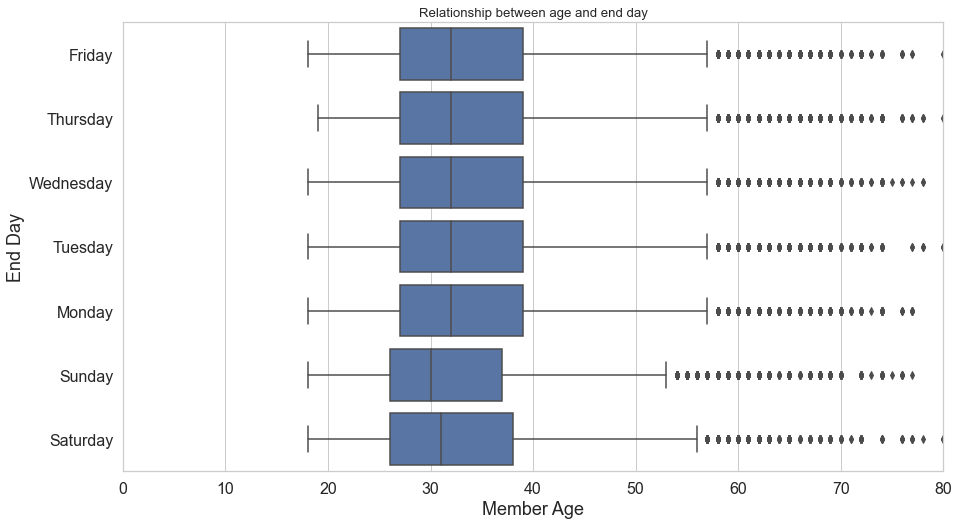

In [30]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.boxplot(data=df2, x='member_age', y='end_day',color=sb.color_palette()[0])
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Member Age', fontsize=18)
plt.ylabel('End Day', fontsize=18)
plt.xlim(0, 80)
plt.title('Relationship between age and end day')


##### Oberservations:
The median age is around 33 years for monday, tuesday, wednesday, thursday and friday, and 31 for saturday and 30 for sunday. Also the differences in box sizes suggest that fewer people go on ride on saturday and sunday.

#### Question: What is the relationship between age and gender?

##### Visualizations

Text(0.5, 1.0, 'Relationship between age and gender')

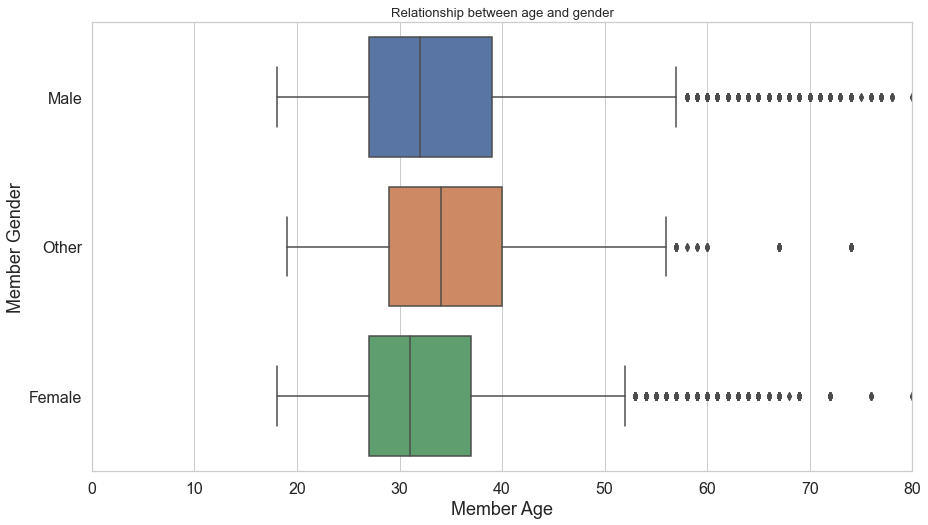

In [31]:
plt.figure(figsize=[14.70, 8.27])

#plot a box plot
ax = sb.boxplot(data=df2, x='member_age', y='member_gender')

#Set font size for the axis
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Member Age', fontsize=18)
plt.ylabel('Member Gender', fontsize=18)

#skip outliers on x axis
plt.xlim(0, 80)
plt.title('Relationship between age and gender')


##### Observations:
Men ages are higher than women own.

#### Question: What is the relationship between member age category and day of the week?

##### Visualizations:
Start day

Text(0.5, 1.0, 'Relationship between member age category and start day')

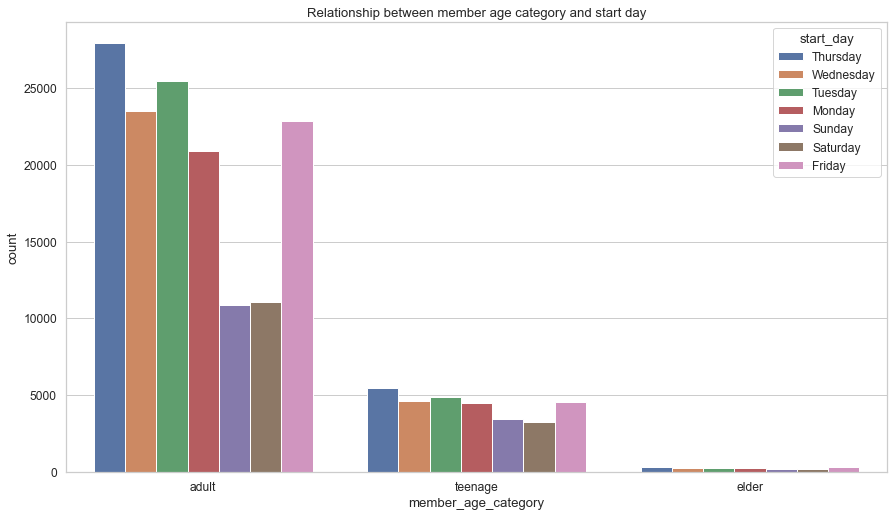

In [32]:
#set the dimensions of the plot
plt.figure(figsize=[14.70, 8.27])
ax = sb.countplot(data=df2, x='member_age_category', hue='start_day')

plt.title('Relationship between member age category and start day')


##### End day

Text(0.5, 1.0, 'Relationship between member age category and end day')

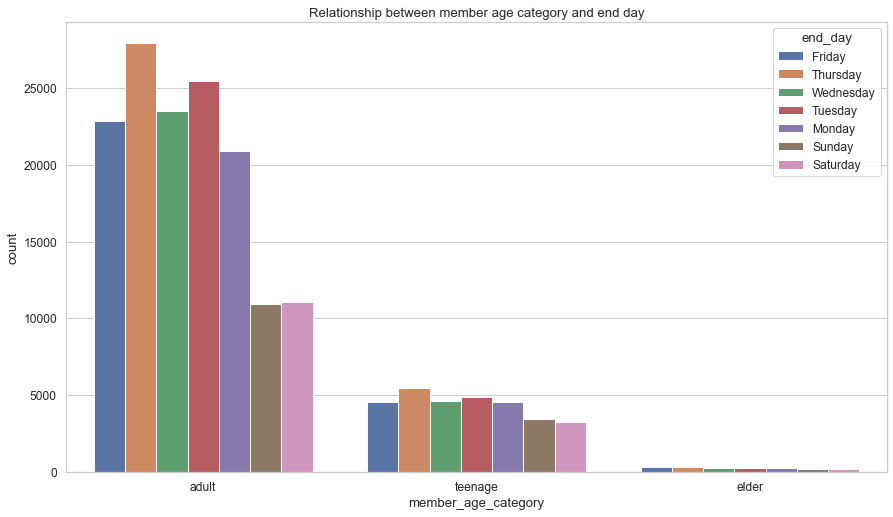

In [33]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.countplot(data=df2, x='member_age_category', hue='end_day')
# ax = sb.catplot(data=df2, y='member_age_category', x='duration_sec', hue='member_gender')
plt.title('Relationship between member age category and end day')


##### Observations:
Most of adults and teenagers and elders start and end on thursday.

#### Question: What is the relationship between bike share for all trip and member age category?

##### Visualizations

Text(0.5, 1.0, 'Relationship between bike share for all trip and member age category')

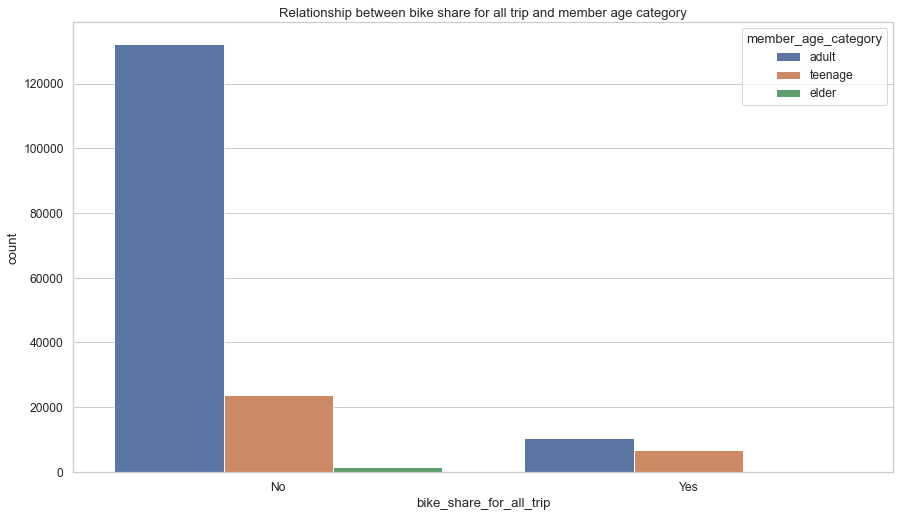

In [34]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.countplot(data=df2, x='bike_share_for_all_trip', hue='member_age_category',)
plt.title('Relationship between bike share for all trip and member age category')


##### Observations:
Most of members do not like bike share and among age cotegories, adults have the highest share.

#### Question: What is the relationship between member gender and member age category?

##### Visualizations

Text(0.5, 1.0, 'Relationship between member gender and member age category')

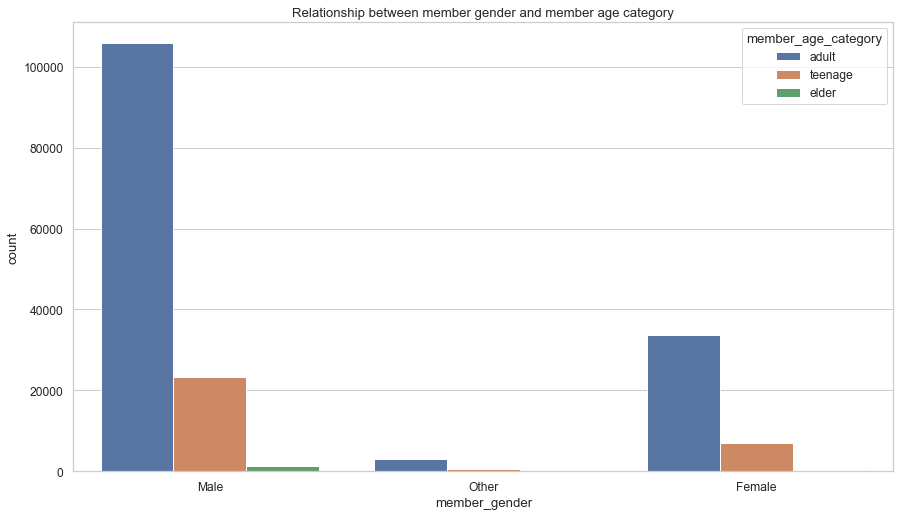

In [35]:
plt.figure(figsize=[14.70, 8.27])

#make a count plot
ax = sb.countplot(data=df2, x='member_gender',
                  hue='member_age_category',)
plt.title('Relationship between member gender and member age category')
# ax.tick_params(rotation=45)


##### Observations:
Most of Males and Females are adults, but there is a non negligeant share for teenagers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? <br>

--- The relationships between age and others variables of interest show that trip duration tents to reduce when age increases, and teenagers and adults have the highest durations.Teenagers and adult mostly start trip on tuesday, wednesday and thursday, but for elders, its thursday and friday. Men are mostly aged than women and the largest number of adult(>120000) and teeangers(21000) and adult do not like bike share for all trip. <br> 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Unfortunately, the start and end month and season columns to not have enough informations. There is only one season: winter, and one start month: february.

In [36]:
df2[df2.member_gender == 'Female'].member_age.mean()

33.22369807621615

## Multivariate Exploration

#### Question: What is the Impact of user type, start periode of the day, start day, and member gender on duration and member age?

##### Visualizations

<Figure size 1058.4x595.44 with 0 Axes>

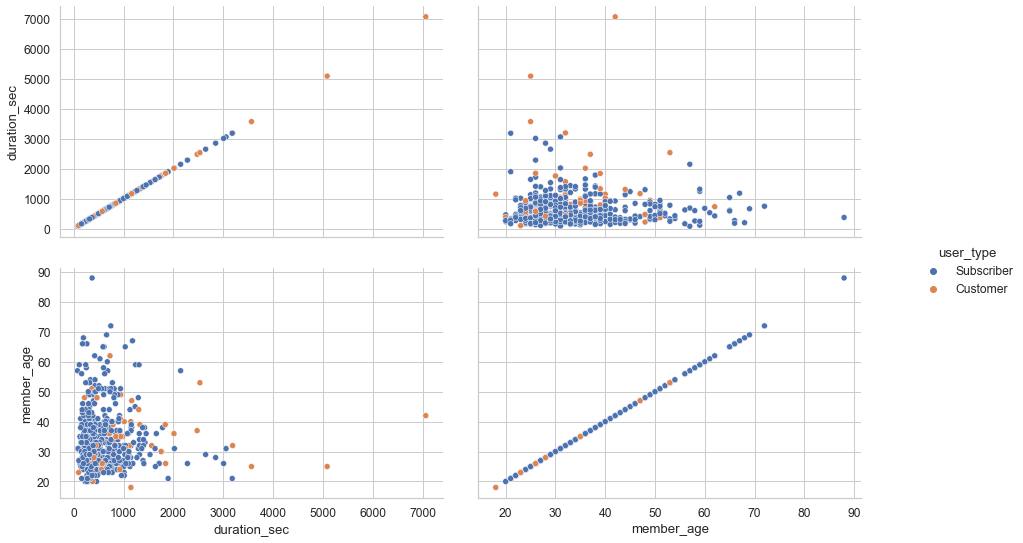

In [37]:

select_numeric_var = df2[['duration_sec', 'member_age',]]

#get a random sample index from the dataset
samples = np.random.choice(df2.index, 500, replace=False)

#use the random indexes to get a random sample from the dataset
bike_samp = df2.loc[samples, :]

plt.figure(figsize=[14.70, 8.27])
g = sb.PairGrid(data=bike_samp, vars=select_numeric_var, hue='user_type',dropna=True, aspect=1.7)

# make a pairdrig map of scatter plots with legend
g.map(sb.scatterplot)
g.add_legend()
g.figure.set_size_inches(14.70, 8.27)



<Figure size 1058.4x595.44 with 0 Axes>

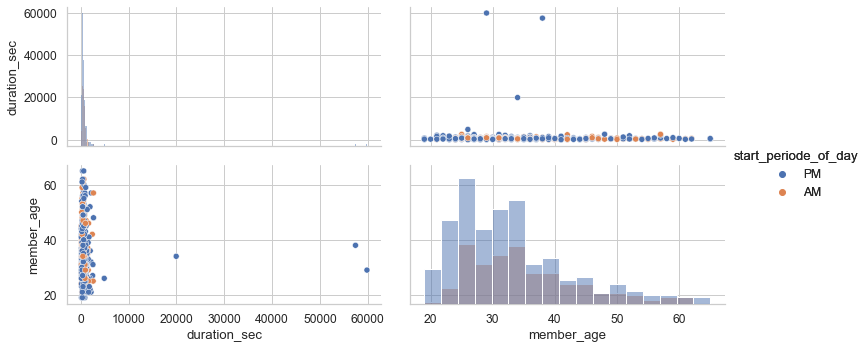

In [38]:
select_numeric_var = df2[['duration_sec', 'member_age', ]]
samples = np.random.choice(df2.index, 500, replace=False)
bike_samp = df2.loc[samples, :]

plt.figure(figsize=[14.70, 8.27])
g = sb.PairGrid(data=bike_samp, vars=select_numeric_var,
                hue='start_periode_of_day', dropna=True, aspect=1.7)
g.map_diag(sb.histplot).add_legend()
g.map_offdiag(sb.scatterplot)
g.add_legend()


<Figure size 1058.4x595.44 with 0 Axes>

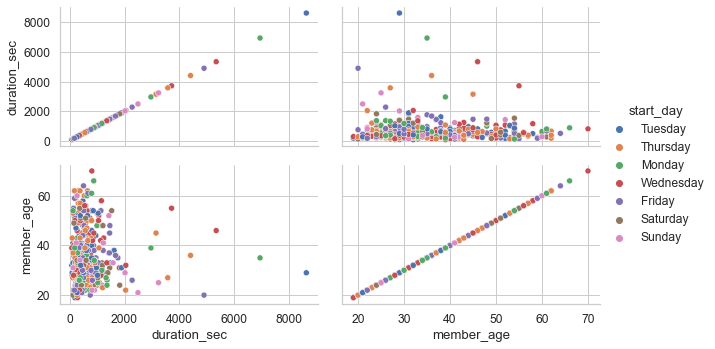

In [39]:
select_numeric_var = df2[['duration_sec', 'member_age', ]]

samples = np.random.choice(df2.index, 500, replace=False)

bike_samp = df2.loc[samples, :]

plt.figure(figsize=[14.70, 8.27])
g = sb.PairGrid(data=bike_samp, vars=select_numeric_var,
                hue='start_day', dropna=True, aspect=1.7)

g.map(sb.scatterplot)
g.add_legend(adjust_subtitles=True)



<Figure size 1058.4x595.44 with 0 Axes>

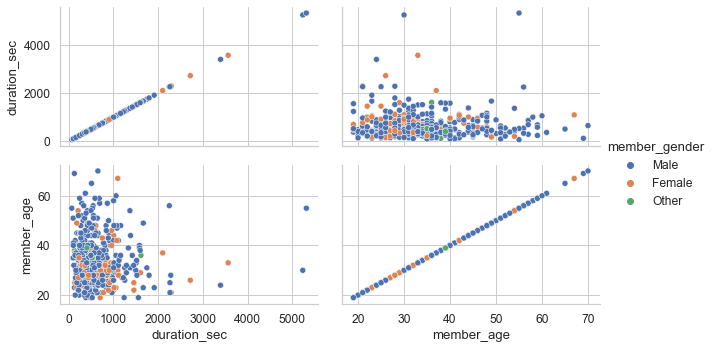

In [40]:
select_numeric_var = df2[['duration_sec', 'member_age', ]]
samples = np.random.choice(df2.index, 500, replace=False)
bike_samp = df2.loc[samples, :]

plt.figure(figsize=[14.70, 8.27])
g = sb.PairGrid(data=bike_samp, vars=select_numeric_var,
                hue='member_gender', dropna=True, aspect=1.7)

g.map(sb.scatterplot)
g.add_legend()


##### Observations:
Customers are mostly teenagers and subscribers are generally adults. The start periode of the day, start day do not seem to have any impact on member age and duration, but concerning member gender, Male are generally older and they also ride longuer than Female.

#### Question: What is the impact of member age on start periode of the day and start day?

#### Visualizations

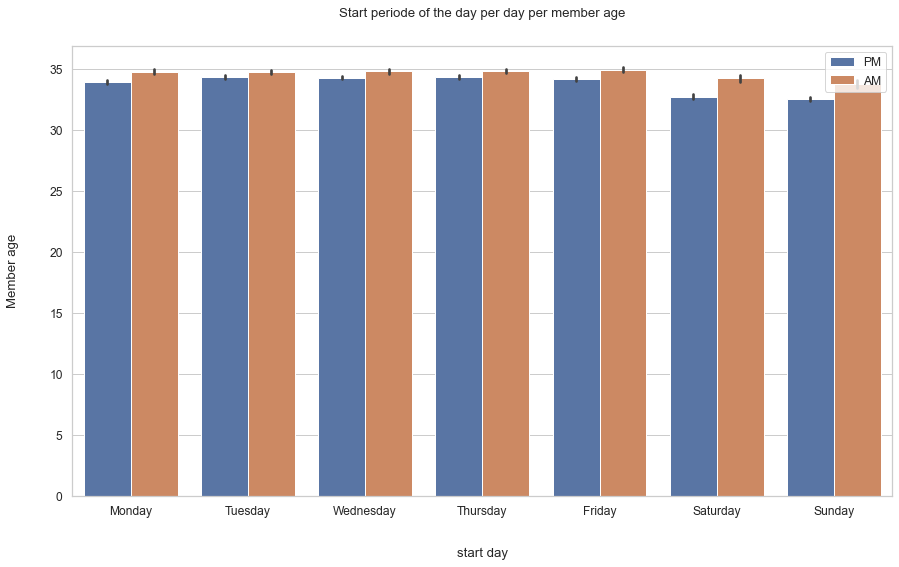

In [41]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.barplot(data=df2, y='member_age', x='start_day', hue='start_periode_of_day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Start periode of the day per day per member age', pad=30)
plt.xlabel('start day', labelpad=30)
plt.ylabel('Member age', labelpad=30)
plt.legend(loc='upper right')


##### Observations:
Members who are less older than 35 years tend to prefer to start in the morning than in the afternoon.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We have noticed that most of the ride with high duration start on thursday in the afternoon and the drivers are mostly men.

### Were there any interesting or surprising interactions between features?

Nothing in particular!

## Conclusions
The bike ride is heavily dominated by men adults. Men usually travel for longuer durations than women and they mostly start their trip in the afternoon. The travel duration deacreases with age and the most aged riders are men. The majority of the trips start on tuesday, wednesday and thursday and the user type is highly dominated by subscribers over customers. 
